## HOMEWORK - 10 points

Repeat the binary classification with Glycerophospholipids, and check which features are important. To clarify the question, you have already performed multi-class classification. You simply need to obtain AUROC and feature importances for Glycerophospholipids vs. Not_Glycerophospholipids. 

Make a single Jupyter Notebook with your name in the file name, and upload it on Canvas. Points will be given as follows:

1. How easy is it to run the code? -- 2 points
2. Is the code well-commented? -- 2 points
3. Is the AUROC graph correct? -- 2 points
4. Is the Feature Importance graph correct? -- 2 point
5. Is there an interpretation provided for feature importance -- 2 points

This exercise should take <15 minutes to complete and submit. Submit on Canvas by Wed morning 9am.

In [1]:
#Needed packages and libraries for this model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Plotting the Area Under the Receiver Operating Characteristic (AUROC) curve
from sklearn.metrics import roc_curve, auc



In [2]:
#Read in the file
s = pd.read_csv('small_input_file.tab',sep="\t")

#Gettings the labels, features, and qualitative categories from the dataset s
annot=s[s.columns[0:5]]
labels=s['Category']
feats=s[s.columns[5:]]

#Splitting the data set into training and testing sets with 20% going to the test set
train_feats, test_feats, train_labels, test_labels  = train_test_split (feats, labels, test_size=0.2)


In [3]:
#Defining the function to train the machine Learning model, it is a multi-class classifier.

def random_forest_classifier(features, target):
    """
    To train the random forest classifier with features and target data
    :param features: features
    :param target: labels
    :return: trained random forest classifier
    """
    clf = RandomForestClassifier(n_estimators=100)
    #estimators stands for the number of decision trees you want to implement
    #Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    clf.fit(features, target)
    return clf

In [4]:
#The unique labels in our dataset
class_names=list(set(train_labels))

#Reclassifies our data set as glycerophospholipids or not
for name in class_names:
    #print (name)
    if name=='Glycerophospholipids': #keeps these as glycerophospholipids
        pass
    else:
        train_labels=pd.Series(train_labels).str.replace(name,'Not_GPL') #replace labels in training
        test_labels=pd.Series(test_labels).str.replace(name,'Not_GPL') #replace labels in test
        
#Run Random Forest classifier on them and print the overall model score
rf = RandomForestClassifier(n_estimators=100, oob_score=True) #our model with 100 trees
trained_model = rf.fit(train_feats, train_labels) #fits the model
model_scores = rf.score(test_feats, test_labels) #sees the accuracy
print ("Overall model score: ", model_scores)

Overall model score:  0.9981343283582089


In [5]:
#Get the Area Under the Receiver Operating Characteristic (AUC-ROC or AUROC)
y_score=trained_model.predict_proba(test_feats)[:, 1]
#fpr, tpr, _ = roc_curve(test_labels2, y_score, pos_label='Fatty_Acyls')
fpr, tpr, _ = roc_curve(test_labels, y_score, pos_label='Not_GPL') #need to use Not_GPL to get the right one



roc_auc = auc(fpr, tpr) #fpr is false positive rate, tpr is true positive rate
print (roc_auc)

0.9999911835043367


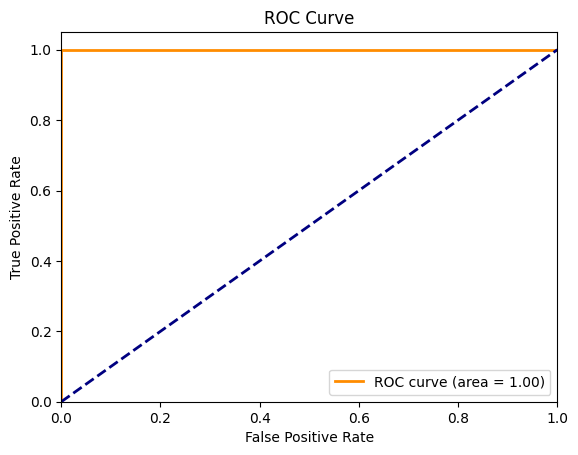

In [6]:
#Plot the AUROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.title('Glycerophospholipids AUROC')
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

              importance
C:P             0.383719
NumofP          0.302723
NumofO          0.063914
AMD             0.048393
C:N             0.046813
H:O             0.036562
C:O             0.025583
NumofH          0.021288
NumofN          0.019745
Mass            0.014780
NumofC          0.009643
Afterdecmass    0.008438
RMD             0.007538
H:C             0.007257
NumofS          0.002649
C:S             0.000957


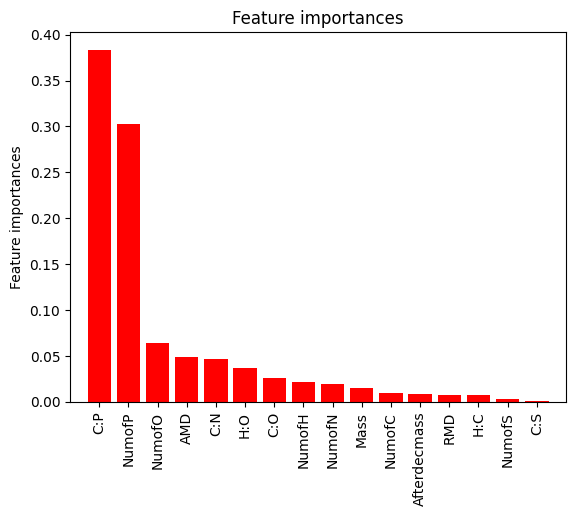

In [7]:
## Feature importance

feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = train_feats.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

# Prints the importance of each feature sorted from most important to least
print (feature_importances)

# Plot the feature importances of the forest
figcolumns=feature_importances.index.values
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_feats.shape[1]), feature_importances.importance,
       color="r", align="center")
plt.ylabel("Feature importances")
plt.xticks(range(train_feats.shape[1]), figcolumns, rotation='vertical')
plt.xlim([-1, train_feats.shape[1]])
plt.show()

**Discussion:**  
The most important features for classifying glycerophospholipids are: the C:P ratio and the number of P. This makes sense because one of the main defining features of glycerophosopholipids is the fact that they have phospholipids which must include phosphorous. None of the other labels have phosphorous as a rule, but glycerophospholipids must have them. 

In [8]:
class_names

['Glycerophospholipids',
 'Sphingolipids',
 'Saccharolipids',
 'Polyketides',
 'Prenol_Lipids',
 'Glycerolipids',
 'Sterol_Lipids',
 'Fatty_Acyls']